In [ ]:
화소처리 _ 이미지, 영상화소 / 밝기 변환 / 히스토그램 / 컬러공간

2D : 2차원 데이터 행렬 연산 -> 화소추출 / 값 / 수정 / 새로운 화소를 추가 할 수 있다.


In [3]:
#8)화소처리 _ 이미지 영상화소를 위한 2D 추출 후 변환
import cv2
import numpy as np

def mysu_res(mysu_r):  # mysu_r = mysu
    for i in range(mysu_r.shape[0]): #행 추출
        for j in range(mysu_r.shape[1]): #열 추출
            res_value = mysu_r.item(i,j) #요소를 접근
            mysu_r.itemset((i,j),res_value*2) #원소의 값을 연산후 재대입

mysu = np.arange(10).reshape(2,5)  #---> mysu.shape[0]행, mysu.shape[1]열
print("원본데이터 : \n",mysu, type(mysu.shape[0]),type(mysu.shape[1]), type(mysu))

mysu_res(mysu)
print("요소값 변경 후 : \n%s \n"%mysu)

원본데이터 : 
 [[0 1 2 3 4]
 [5 6 7 8 9]] <class 'int'> <class 'int'> <class 'numpy.ndarray'>
요소값 변경 후 : 
[[ 0  2  4  6  8]
 [10 12 14 16 18]] 



In [7]:
#8-1) 수행 시간을 체크해보자.
import cv2
import numpy as np
import time

# 3. 시간을 체크하는 함수
def time_check(func, message):
    start_time = time.perf_counter()
    ret_img = func(image)
    res_time = (time.perf_counter() - start_time)*1000
    print(message,"수행시간 체크 : %.2f ms"% res_time)
    return ret_img

# 2. 이미지의 화소를 그대로 읽어서 리턴받는 함수
def img_access01(image):
    img_res = np.zeros(image.shape[:2], image.dtype)
    for i in range(image.shape[0]): #행 추출
        for j in range(image.shape[1]): #열 추출
            pixel = image[i,j]  #원본이미지의 화소를 추출해서 pixel 저장
            img_res[i,j] = 255-pixel  #화소를 대입
    return img_res

# 2. 이미지의 화소를 item() 방식으로 접근
def img_access02(image):
    img_res = np.zeros(image.shape[:2], image.dtype)
    for i in range(image.shape[0]): #행 추출
        for j in range(image.shape[1]): #열 추출
            pixel = image.item(i,j)  #원본이미지의 화소를 추출해서 pixel 저장
            img_res.itemset((i,j), 255-pixel)  #화소를 대입
    return img_res
    
#2-3 
def img_access03(image):
    lookup = [255-i for i in range(256)]
    lookup = np.array(lookup, np.uint8)
    res_img = lookup[image]
    return res_img
    
#2-4 opencv
def img_access04(image):
    res_img = cv2.subtract(255,image)
    return res_img

#2-5 mdarrau
def img_access05(image):
    res_img = 255-image
    return res_img

# 1. 이미지를 호출
image = cv2.imread('c:\\opencv_test\\Lenna.png',cv2.IMREAD_GRAYSCALE)
if image is None : raise Exception("파일 오류")
    


# 4. 내용을 확인
image1 = time_check(img_access01,"[case 1] : image read")
image2 = time_check(img_access02,"[case 2] : image item()")
image3 = time_check(img_access03,"[case 3] : 룩업테이블")
image4 = time_check(img_access04,"[case 4] : opencv")
image5 = time_check(img_access05,"[case 5] : ndarray")
cv2.imshow("원본 image", image)
cv2.imshow("직접 접근 image", image1)
cv2.imshow("item() 접근 image", image2)
cv2.imshow("lookup image", image3)
cv2.imshow("opencv", image4)
cv2.imshow("ndarray", image5)


cv2.waitKey(0)
cv2.destroyAllWindows()

[case 1] : image read 수행시간 체크 : 177.15 ms
[case 2] : image item() 수행시간 체크 : 21.01 ms
[case 3] : 룩업테이블 수행시간 체크 : 0.43 ms
[case 4] : opencv 수행시간 체크 : 0.04 ms
[case 5] : ndarray 수행시간 체크 : 0.05 ms


In [10]:
#8-2) 화소값 체크
import numpy as np, cv2

#img = np.zeros((50,512), np.uint8)
#img02 = np.zeros((50,512), np.uint8)

#? 흑백으로 가져와야해 ? RGB -> 흑백 -> 휘도 신호, BR.601 YUV
#y = 0.299*R + 0.587 * G + 0.144*B
#BGR => CV2

#cv2.cvtColor() / cv2.COLOR_BGR2GRAY

img = cv2.imread('c:\\opencv_test\\Lenna.png',cv2.IMREAD_GRAYSCALE)
img02 = cv2.imread('c:\\opencv_test\\Lenna.png',cv2.IMREAD_GRAYSCALE)

row, col = img.shape[:2]

#행열로 화소값 나열 후 확인
for i in range(row):
    for j in range(col):
        img.itemset((i,j),j//2) #화소의 점진적 증가값 확인
        img02.itemset((i,j),j//20*10) #화소의 계단식

cv2.imshow("img",img)
cv2.imshow("img02", img02)
        
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
#8-2) 화소값 체크
import numpy as np, cv2

img = cv2.imread('c:\\opencv_test\\Lenna.png',cv2.IMREAD_GRAYSCALE)

#opencv 함수를 이용해서 영상을 밝게  0~255
res_img = cv2.add(img,100)   #250+100 = 350 -> 255 :saturation 방식
#opencv 함수를 이용해서 영상을 어둡게
res_img02 = cv2.subtract(img, 100)

#numpy 연산
res_img03 = img +100  # 250+100 = 350%256 -> 104 : moduler 방식
res_img04 = img -100



cv2.imshow("img",img)
cv2.imshow("res_img",res_img)
cv2.imshow("res_img02",res_img02)
cv2.imshow("res_img03",res_img03)
cv2.imshow("res_img04",res_img04)
        
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
import numpy as np, cv2
img = cv2.imread('c:\\opencv_test\\1.jpg',cv2.IMREAD_GRAYSCALE)

n_img = np.zeros(img.shape[:2], img.dtype)  # 더미 이미지 생성

r_img = cv2.scaleAdd(img,0.5,n_img) + 10 #영상대비 감소
r_img02 = cv2.scaleAdd(img,2.0,n_img)  #영상대비 증가

#영상화소의 평균값의 절반정도 계산
m_res = cv2.mean(img)[0]/2.0
print(m_res)
r_img03 = cv2.addWeighted(img,0.5,n_img,0,m_res) + 10 #명암대비 감소
r_img04 = cv2.addWeighted(img,2.0,n_img,0,m_res)  #명암대비 증가

cv2.imshow("img",img)
cv2.imshow("r_img",r_img)
cv2.imshow("r_img02",r_img02)
cv2.imshow("r_img03",r_img03)
cv2.imshow("r_img04",r_img04)
        
cv2.waitKey(0)
cv2.destroyAllWindows()

63.22041287289532


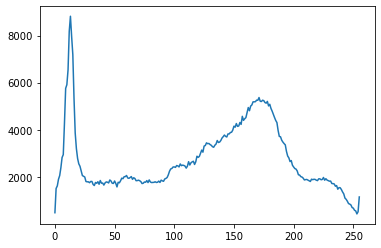

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('c:\\opencv_test\\1.jpg')
res = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#흑백 : 0  /  channels = [0] 블루, channels = [1] 그린, channels = [2] 레드
hist_values = cv2.calcHist([res],channels=[0],mask=None,histSize=[256],ranges=[0,256])
hist_values.shape

plt.plot(hist_values)

#plt.imshow(show_bird)

이미지크기 : (683, 1024, 3)


Text(0.5, 1.0, 'my_img')

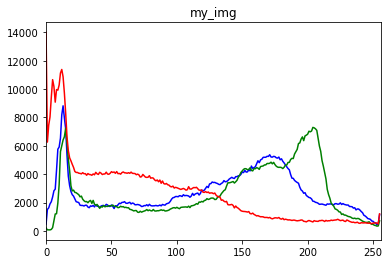

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('c:\\opencv_test\\1.jpg')
print("이미지크기 :", img.shape)
res = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
color = ('b','g','r')

for i, col in enumerate(color):
    hist_values = cv2.calcHist([res],[i],None,[256],[0,256])
    plt.plot(hist_values,color = col)
    plt.xlim([0,256])

plt.title("my_img")

#plt.imshow(show_bird)

이미지크기 : (683, 1024, 3)


Text(0.5, 1.0, 'my_image')

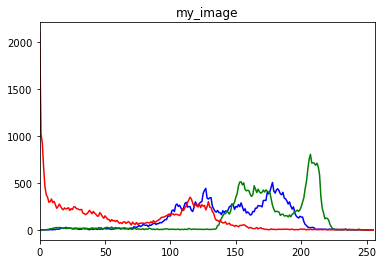

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('c:\\opencv_test\\1.jpg')
print("이미지크기 :", img.shape)
res = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
color = ('b','g','r')

#특정영역의 마스크를 지정 한다
mask = np.zeros(img.shape[:2],np.uint8) # 검정
mask[300:400, 100:400] = 255 #흰색

#마스크 확인
#plt.imshow(mask, cmap = 'gray')

for i, col in enumerate(color):
    hist_values = cv2.calcHist([res],[i],mask,[256],[0,256])
    plt.plot(hist_values,color = col)
    plt.xlim([0,256])
    
plt.title("my_image")

이미지크기 : (683, 1024, 3)


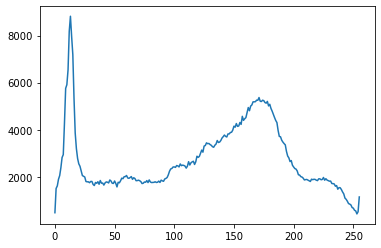

In [33]:
#9-4 이미지, 마스크랑 이미지랑 결합
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('c:\\opencv_test\\1.jpg')
print("이미지크기 :", img.shape)
res = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
color = ('b','g','r')

#특정영역의 마스크를 지정 한다
mask = np.zeros(img.shape[:2],np.uint8) # 검정
mask[300:600, 100:600] = 255 #흰색

# 마스크가 된 히스토그램을 만들어 보자.
hist_values_red = cv2.calcHist([img],[2],mask,[256],[0,256])
hist_values_all = cv2.calcHist([img],[2],None,[256],[0,256])

plt.plot(hist_values_all)


#기존의 이미지랑 마스크 이미지랑 병합
mask_img = cv2.bitwise_and(img,img,mask = mask)
#plt.imshow(mask_img)

#마스크 확인
#plt.imshow(mask, cmap = 'gray')
    
#plt.title("my_image")

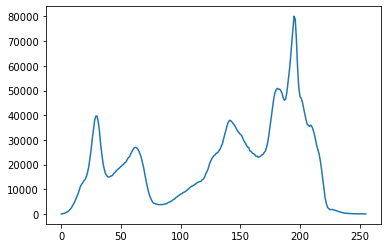

In [45]:
#9-5 히스토그램 평탄화 : 화소값이 특정 부분에 편중화 되어있을 경우 골고루 색깔을 평탄하게 이미지 조정
#9-4 이미지, 마스크랑 이미지랑 결합을 해보자
import cv2
import numpy as np
import matplotlib.pyplot as plt

def img_view(img,cmap = None):
    fig = plt.figure(figsize = (10,5))  #plt의 영역(영역사이즈)
    ax = fig.add_subplot(111)  #1*1 영역 중 1번쨰 위치에 좌표평면에 그려라
    ax.imshow(img,cmap)
    
img = cv2.imread('c:\\opencv_test\\parang_1.jpg',0)
#img_view(img,cmap = 'gray')

hist_values_all = cv2.calcHist([img],[0],None,[256],[0,256])
#plt.plot(hist_values_all)

# equalizeHist(src[, dst]) -> dst 평탄화

eq_img = cv2.equalizeHist(img)
#img_view(eq_img,cmap='gray')

hist_eq = cv2.calcHist([eq_img],[0],None,[256],[0,256])
plt.plot(hist_values_all)

In [46]:
#10-3) 이미지, 마스크 이미지랑 결합을 해보자
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("C:\\Test\\Img\\parang_1.jpg")
res = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#원하는 위치에 원하는 크기로 마스크 만들기
mask = np.zeros(img.shape[:2], np.uint8)  #검정
mask[100:120, 200:280] = 255 #원하는 부분만 흰색으로 바꿈

#마스크가 된 히스토그램을 만들어보자.
hist_values_red = cv2.calcHist([img], channels=[2], mask=mask, histSize=[256], ranges=[0,256])
hist_values_all = cv2.calcHist([img], channels=[2], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist_values_red)

#기존의 이미지랑 마스크 이미지랑 병합
mask_img = cv2.bitwise_and(img, img, mask=mask)
# plt.imshow(mask_img)



#마스크 확인
# plt.imshow(mask, cmap='gray')

# plt.title("my_img")    
# plt.show()

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-i1s8y2i1\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [2]:
#트랙바를 사용해서 컬러 공간 변환
import cv2
import numpy as np
import matplotlib.pyplot as plt

def onChange(value):
    tb[0] = cv2.getTrackbarPos("my_trackbar", "result")
    tb[1] = cv2.getTrackbarPos("my_trackbar02", "result")
    
    my_a, res = cv2.threshold(result,tb[1],255,cv2.THRESH_TOZERO_INV)
    cv2.threshold(res,tb[0],255,cv2.THRESH_BINARY,res)
    cv2.imshow("result",res)

img_bgr = cv2.imread('c:\\opencv_test\\1.jpg',cv2.IMREAD_COLOR)
img_hsv = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2HSV)  #BGR -> HSV로 벼노한 (컬러공간을 변환)

result = np.copy(img_hsv[:,:,0]) #색상을 복사 / 0[색상], 1[채도], 2[밝기]

tb = [50,100] # 트랙바로 선택할 변수 범위
cv2.namedWindow("result")
cv2.createTrackbar("my_trackbar", "result", tb[0], 255, onChange)
cv2.createTrackbar("my_trackbar02", "result", tb[1], 255, onChange)

onChange(tb[0]) #2진화 작업
cv2.imshow("img_bgr",img_bgr)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
5. 히스토그램을 계산하는 함수 : cv2. calcHist() 함수는 매개인수로 입력이미지 또는 영상의 행렬, 입력영상채널,
    마스크행렬, 출력결과행렬, 결과행렬의 차원수, 계급크기, 각 채널범위등으로 구성된다.
6. histogram stretching : 히스토그램의 분포가 한쪽으로 치우쳐서 분포가 좁아서 영상의 대비가 좋지 않은 영상을
                          개선하는 알고리즘
7. histogram equalization : 특정 부분에서 한쪽으로 치우친 명암분포를 가진 영상을 히스토그램의 재분배과정을 거쳐서
                            균등하게 만들어 주는 알고리즘
8. 컬러공간이란 색 표시계의 모든 색들을 색공간에서 3차원 좌표로 표현한 것을 말한다.
9. RGB : 모니터에서 주로 사용 , CMY : 프린터에서 사용, HSI : 인간의 시각 시스템과 유사한 알고리즘
   YcbCr : JPEG 등의 압축영상에 사용, YUV : 방송시스템에 사용, XYZ, La*b* -> 컬러공간
   cv2.cvtColor() 컬러공간 변환
        